In [2]:
import numpy as np
import pandas as pd




In [3]:
data = pd.read_csv("sparklingwine.csv", delimiter=";")

In [4]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
795,10.8,0.89,0.30,2.6,0.132,7.0,60.0,0.99786,2.99,1.18,10.2,5
796,8.7,0.46,0.31,2.5,0.126,24.0,64.0,0.99746,3.10,0.74,9.6,5
797,9.3,0.37,0.44,1.6,0.038,21.0,42.0,0.99526,3.24,0.81,10.8,6
798,9.4,0.50,0.34,3.6,0.082,5.0,14.0,0.99870,3.29,0.52,10.7,5


In [39]:
data['good wine'] = np.where(data['quality']>5, True, False)


In [117]:
train = data.iloc[:400]
validation = data.iloc[400:600]
test = data.iloc[600:800]

#train = data.iloc[:400]
#validation = data.iloc[400:600]
#test = data.iloc[600:800]

train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good wine
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,5,False
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.0,0.370,0.76,4.2,0.066,7.0,38.0,1.0004,3.22,0.60,13.0,6,True
396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.9994,3.47,0.53,9.9,5,False
397,11.5,0.590,0.59,2.6,0.087,13.0,49.0,0.9988,3.18,0.65,11.0,5,False
398,11.5,0.590,0.59,2.6,0.087,13.0,49.0,0.9988,3.18,0.65,11.0,5,False


In [120]:
from sklearn import preprocessing


train_z = preprocessing.scale(train.iloc[:, 0:11])
train_Y = train.iloc[:, 12:]


test_z = preprocessing.scale(test.iloc[:, 0:11])
test_Y = test.iloc[:, 12:]


val_z = preprocessing.scale(validation.iloc[:, 0:11])
val_Y = validation.iloc[:, 12:]



In [112]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the train data
scaler.fit(train)

# Transform the train and test data
X_train_scaled = scaler.transform(train)
X_val_scaled = scaler.transform(validation)
X_test_scaled = scaler.transform(test)

X_val_scaled

array([[-1.01406908e+00,  1.10398855e+00, -1.20741543e+00, ...,
         1.05388784e+00, -7.61105165e-01, -1.08161494e-01],
       [-4.04602620e-01, -1.61220211e+00,  1.25036321e-01, ...,
        -1.07065717e-01, -1.02722585e+00,  8.60448901e-01],
       [ 2.08866926e+00, -3.54176966e-01,  1.26713782e+00, ...,
        -1.33251670e+00, -4.06277582e-01,  5.37578769e-01],
       ...,
       [ 1.92245114e+00,  2.17652646e-01,  1.45748807e+00, ...,
        -1.39701412e+00, -3.17570687e-01, -5.38116886e-04],
       [ 3.86457142e-02,  2.46244127e-01, -4.46014431e-01, ...,
        -6.87542498e-01, -9.82872404e-01, -2.15784871e-01],
       [ 2.36569947e+00,  2.74835608e-01,  8.38849760e-01, ...,
        -1.97749090e+00, -7.09655166e-03, -7.53901758e-01]])

In [113]:
display(val_z)

array([[-1.66636106,  1.52665585, -2.30624886, ...,  1.59553559,
        -1.06533452, -0.52416297],
       [-1.1108232 , -1.37747522, -0.71121445, ...,  0.38654209,
        -1.48850613,  0.28919336],
       [ 1.16183168, -0.03240399,  0.6559579 , ..., -0.88961772,
        -0.50110571,  0.01807459],
       ...,
       [ 1.01032135,  0.57899202,  0.88381996, ..., -0.95678402,
        -0.36004851, -0.43379004],
       [-0.70679567,  0.60956183, -1.39480063, ..., -0.21795466,
        -1.41797753, -0.61453589],
       [ 1.41434889,  0.64013163,  0.14326827, ..., -1.56128078,
         0.1336517 , -1.06640052]])

In [114]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(train_z, train_Y)

ValueError: at least one array or dtype is required

In [110]:
from sklearn.metrics import confusion_matrix
pred = neigh.predict(test_z)
pred
cm = confusion_matrix(test_Y, pred)

answer = cm[0][1]+cm[1][0]

cm



NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [61]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, pred))


              precision    recall  f1-score   support

       False       0.99      1.00      0.99       187
        True       1.00      0.85      0.92        13

    accuracy                           0.99       200
   macro avg       0.99      0.92      0.96       200
weighted avg       0.99      0.99      0.99       200



In [63]:
fin = {}


for i in range(1,101):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(train_z, train_Y.values.ravel())
    
    pred = neigh.predict(val_z)
    cm = confusion_matrix(val_Y, pred)
    answer = cm[0][1]+cm[1][0]
    
    
    fin[i] = answer
fin


{1: 43,
 2: 47,
 3: 42,
 4: 52,
 5: 47,
 6: 51,
 7: 50,
 8: 51,
 9: 49,
 10: 53,
 11: 50,
 12: 53,
 13: 52,
 14: 54,
 15: 53,
 16: 55,
 17: 53,
 18: 55,
 19: 55,
 20: 56,
 21: 56,
 22: 58,
 23: 57,
 24: 59,
 25: 59,
 26: 59,
 27: 56,
 28: 58,
 29: 57,
 30: 57,
 31: 57,
 32: 58,
 33: 58,
 34: 59,
 35: 57,
 36: 60,
 37: 60,
 38: 61,
 39: 58,
 40: 59,
 41: 59,
 42: 61,
 43: 59,
 44: 62,
 45: 62,
 46: 62,
 47: 62,
 48: 63,
 49: 62,
 50: 62,
 51: 62,
 52: 64,
 53: 64,
 54: 64,
 55: 64,
 56: 64,
 57: 64,
 58: 64,
 59: 64,
 60: 64,
 61: 64,
 62: 64,
 63: 64,
 64: 64,
 65: 64,
 66: 64,
 67: 64,
 68: 64,
 69: 64,
 70: 64,
 71: 64,
 72: 64,
 73: 64,
 74: 64,
 75: 64,
 76: 64,
 77: 64,
 78: 64,
 79: 64,
 80: 64,
 81: 64,
 82: 64,
 83: 64,
 84: 64,
 85: 64,
 86: 64,
 87: 64,
 88: 64,
 89: 64,
 90: 64,
 91: 64,
 92: 64,
 93: 64,
 94: 64,
 95: 64,
 96: 64,
 97: 64,
 98: 64,
 99: 64,
 100: 64}

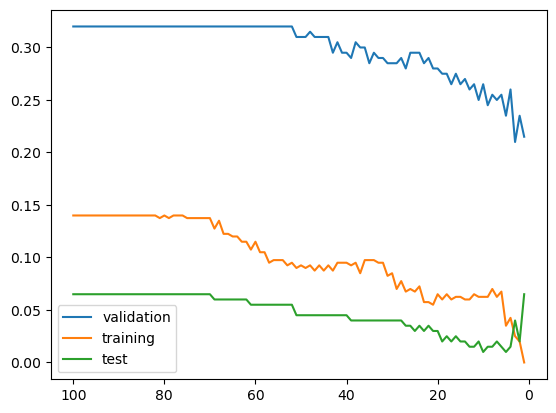

In [68]:
final = {}
final1 = {}
final3 = {}


for i in range(1,101):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(train_z, train_Y.values.ravel())
    
    pred = neigh.predict(val_z)
    pred1 = neigh.predict(train_z)
    pred2 = neigh.predict(test_z)
    
    cm = confusion_matrix(val_Y, pred)
    cm1 = confusion_matrix(train_Y, pred1)
    cm3 = confusion_matrix(test_Y, pred2)
    
    
    answer = cm[0][1]+cm[1][0]
    ans = answer/200
    
    answer1 = cm1[0][1]+cm1[1][0]
    ans1 = answer1/400
    
    answer3 = cm3[0][1]+cm3[1][0]
    ans3 = answer3/200
    
    
    final[i] = ans
    final1[i] = ans1
    final3[i] = ans3


import matplotlib.pyplot as plt

myList = final.items()
myList = sorted(myList) 
x, y = zip(*myList) 



myList1 = final1.items()
myList1 = sorted(myList1) 
x1, y1 = zip(*myList1) 

myList3 = final3.items()
myList3 = sorted(myList3) 
x3, y3 = zip(*myList3) 



plt.plot(x, y, label = "validation")
plt.plot(x1, y1, label = "training")
plt.plot(x3, y3, label = "test")


plt.gca().invert_xaxis()   # invert X axis

plt.legend()

plt.show()




In [115]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the train data
scaler.fit(train)

# Transform the train and test data
X_train_scaled = scaler.transform(train)
X_val_scaled = scaler.transform(validation)
X_test_scaled = scaler.transform(test)

X_train_scaled

array([[-0.57082075,  0.90384818, -1.30259056, ...,  1.31187753,
        -0.62804482, -0.64627838],
       [-0.34919658,  1.93314148, -1.30259056, ..., -0.6875425 ,
        -0.09580345, -0.21578487],
       [-0.34919658,  1.24694595, -1.11224031, ..., -0.30055798,
        -0.22886379, -0.21578487],
       ...,
       [ 1.70082697,  0.27483561,  1.50507564, ..., -0.81653734,
        -0.22886379,  1.07569566],
       [ 1.70082697,  0.27483561,  1.50507564, ..., -0.81653734,
        -0.22886379,  1.07569566],
       [ 0.1494578 ,  1.27553743, -0.25566418, ..., -1.3325167 ,
        -0.67239827, -0.64627838]])

In [90]:
test_Y

,good wine
600,False
601,False
602,False
603,False
604,False
...,...
795,False
796,False
797,True
798,False


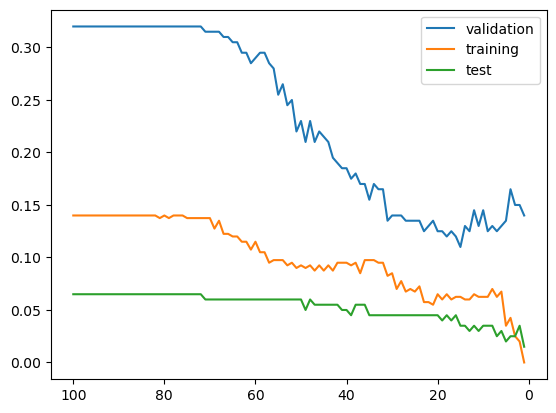

[0.86,
 0.85,
 0.85,
 0.835,
 0.865,
 0.87,
 0.875,
 0.87,
 0.875,
 0.855,
 0.87,
 0.855,
 0.875,
 0.87,
 0.89,
 0.88,
 0.875,
 0.88,
 0.875,
 0.875,
 0.865,
 0.87,
 0.875,
 0.865,
 0.865,
 0.865,
 0.865,
 0.86,
 0.86,
 0.86,
 0.865,
 0.835,
 0.835,
 0.83,
 0.845,
 0.83,
 0.83,
 0.82,
 0.825,
 0.815,
 0.815,
 0.81,
 0.805,
 0.79,
 0.785,
 0.78,
 0.79,
 0.77,
 0.79,
 0.77,
 0.78,
 0.75,
 0.755,
 0.735,
 0.745,
 0.72,
 0.715,
 0.705,
 0.705,
 0.71,
 0.715,
 0.705,
 0.705,
 0.695,
 0.695,
 0.69,
 0.69,
 0.685,
 0.685,
 0.685,
 0.685,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68,
 0.68]

In [121]:
vis_val = {}
vis_train = {}
vis_test = {}

error_rate = []


for i in range(1,101):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_scaled, train_Y.values.ravel())
    
    pred = neigh.predict(X_val_scaled)
    pred1 = neigh.predict(X_train_scaled)
    pred2 = neigh.predict(X_test_scaled)
    
    error_rate.append(neigh.score(X_val_scaled, val_Y))

    
    
    cm = confusion_matrix(val_Y, pred)
    cm1 = confusion_matrix(train_Y, pred1)
    cm3 = confusion_matrix(test_Y, pred2)
    
    
    answer = cm[0][1]+cm[1][0]
    ans = answer/200
    
    answer1 = cm1[0][1]+cm1[1][0]
    ans1 = answer1/400
    
    answer3 = cm3[0][1]+cm3[1][0]
    ans3 = answer3/200
    
    
    vis_val[i] = ans
    vis_train[i] = ans1
    vis_test[i] = ans3


import matplotlib.pyplot as plt

myList = vis_val.items()
myList = sorted(myList) 
x, y = zip(*myList) 



myList1 = vis_train.items()
myList1 = sorted(myList1) 
x1, y1 = zip(*myList1) 

myList3 = vis_test.items()
myList3 = sorted(myList3) 
x3, y3 = zip(*myList3) 



plt.plot(x, y, label = "validation")
plt.plot(x1, y1, label = "training")
plt.plot(x3, y3, label = "test")


plt.gca().invert_xaxis()   # invert X axis

plt.legend()

plt.show()


error_rate



In [96]:
vis_test

{1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.005,
 23: 0.005,
 24: 0.005,
 25: 0.005,
 26: 0.005,
 27: 0.005,
 28: 0.005,
 29: 0.005,
 30: 0.01,
 31: 0.01,
 32: 0.01,
 33: 0.01,
 34: 0.01,
 35: 0.01,
 36: 0.01,
 37: 0.01,
 38: 0.01,
 39: 0.01,
 40: 0.01,
 41: 0.01,
 42: 0.01,
 43: 0.01,
 44: 0.01,
 45: 0.01,
 46: 0.01,
 47: 0.01,
 48: 0.01,
 49: 0.01,
 50: 0.01,
 51: 0.01,
 52: 0.015,
 53: 0.015,
 54: 0.015,
 55: 0.015,
 56: 0.015,
 57: 0.015,
 58: 0.015,
 59: 0.015,
 60: 0.015,
 61: 0.015,
 62: 0.015,
 63: 0.015,
 64: 0.015,
 65: 0.015,
 66: 0.02,
 67: 0.02,
 68: 0.02,
 69: 0.02,
 70: 0.02,
 71: 0.02,
 72: 0.025,
 73: 0.025,
 74: 0.025,
 75: 0.025,
 76: 0.03,
 77: 0.03,
 78: 0.03,
 79: 0.03,
 80: 0.03,
 81: 0.03,
 82: 0.04,
 83: 0.04,
 84: 0.045,
 85: 0.045,
 86: 0.05,
 87: 0.05,
 88: 0.06,
 89: 0.06,
 90: 0.06,
 91: 0.06,
 

In [ ]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train,y_train)
     pred_i = knn.predict(X_test)
     error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))